In [1]:
include("../../src/Finite_Vol/pnjl_FV.jl")
include("derv.jl")
using Plots 
using LaTeXStrings
using DataFrames, CSV
using QuadGK, LinearAlgebra, Peaks


In [2]:

function parametrize_deformation(R, δ;para=2.0,scale=1.0)
    """
    δ: 变形参数 (0 ≤ δ < ∞)
    para: 调节变形幅度的参数
    scale: +1 压扁 -1 拉长
    - δ = 0: 球形 (a=b=c=R)
    - δ > 0 (且 scale=1.0): 扁平椭球(a=b > c)
    - δ > 0 (且 scale=-1.0): 拉长椭球(a=b < c)
    - 表面积单调递增
    """
    V = (4/3)*π*R^3
    
    # 基于 β₂ 的简化
    β₂ = tanh(δ)  # 保证 β₂ < 1
  #@  para = 1.8
    a = R * (1 + para * β₂)^(scale * 2/3)
    b = a
    c = V / ((4/3)*π*a*b)
    
    return a, b, c
end


parametrize_deformation (generic function with 1 method)

In [29]:
Rs1 = 100.0:-10.0:30.0
Rs2 = 30.0:-2.0:10.0
Rs = unique(vcat(Rs1, Rs2))
e = 0.0
X0 = [-0.01, -0.01, -0.2, 0.8, 0.8]  # phi_u, phi_d, phi_s, Phi1, Phi2
Ts = 220.0:-0.10:150
mu_B = 0.0

data = zeros(length(Rs), 4)  # R, dphi_T dphi1_T lambda
data[:, 1] = Rs
phius = zeros(length(Ts))
Phi1s = zeros(length(Ts))
dphius = zeros(length(Ts))
dPhi1s = zeros(length(Ts))


for (i, R) in enumerate(Rs)
    println("R = ", R)
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    Lambda = Find_IR_el(a, b, c)
    ints = get_nodes_el(128, a, b, c, modes="D")
    X0 = [-0.01, -0.01, -0.2, 0.8, 0.8]  # phi_u, phi_d, phi_s, Phi1, Phi2
    for (j, T) in enumerate(Ts)
        X0 = Tmu(T/hc, mu_B/hc, X0, ints)
        phius[j] = X0[1]
        Phi1s[j] = X0[4]
    end
    derivation!(phius, Ts, dphius)
    derivation!(Phi1s, Ts, dPhi1s)
    inds_max1,_ = findmaxima(dphius)
    inds_max2,_ = findmaxima(dPhi1s)
    dphi_T = Ts[inds_max1[1]]
    dPhi1_T = Ts[inds_max2[1]]
    data[i, 2] = dphi_T
    data[i, 3] = dPhi1_T
    data[i, 4] = Lambda
end
df = DataFrame(R=data[:,1], dphi_T=data[:,2], dPhi1_T=data[:,3], lambda=data[:,4])
outpath = "../../data/FV/dphi_Rs.csv"
CSV.write(outpath, df)

R = 100.0
a,b,c=100.0,100.0,100.0
 IR=0.018009239625647728
a,b,c=100.0,100.0,100.0
 IR=0.018009239625647728
R = 90.0
a,b,c=90.0,90.0,90.0
 IR=0.020010266234120087
a,b,c=90.0,90.0,90.0
 IR=0.020010266234120087
R = 80.0
a,b,c=80.0,80.0,80.0
 IR=0.022511593617284623
a,b,c=80.0,80.0,80.0
 IR=0.022511593617284623
R = 70.0
a,b,c=70.0,70.0,70.00000000000001
 IR=0.02572749325799988
a,b,c=70.0,70.0,70.00000000000001
 IR=0.02572749325799988
R = 60.0
a,b,c=60.0,60.0,60.0
 IR=0.030015400173454526
a,b,c=60.0,60.0,60.0
 IR=0.030015400173454526
R = 50.0
a,b,c=50.0,50.0,50.0
 IR=0.03601847925049117
a,b,c=50.0,50.0,50.0
 IR=0.03601847925049117
R = 40.0
a,b,c=40.0,40.0,40.0
 IR=0.04502309902270623
a,b,c=40.0,40.0,40.0
 IR=0.04502309902270623
R = 30.0
a,b,c=30.0,30.0,30.0
 IR=0.06003080029233736
a,b,c=30.0,30.0,30.0
 IR=0.06003080029233736
R = 28.0
a,b,c=28.0,28.0,27.999999999999996
 IR=0.06431871339158048
a,b,c=28.0,28.0,27.999999999999996
 IR=0.06431871339158048
R = 26.0
a,b,c=26.0,26.0,26.0
 IR=0.0692

"../../data/FV/dphi_Rs.csv"

In [9]:
es1 = 0.0:0.1:1.0
es2 = 1.0:0.5:20.0
es = unique(vcat(collect(es1), collect(es2)))
areas = zeros(length(es))

R = 30.0
area0 = 4 * pi * R^2
Lambdas = zeros(length(es))
for (i, e) in enumerate(es)
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    areas[i] = 4 * pi * ((a^1.6075 * b^1.6075 + a^1.6075 * c^1.6075 + b^1.6075 * c^1.6075)/3)^(1/1.6075) / area0
    Lambdas[i] = Find_IR_el(a, b, c) 
end
plot(es, Lambdas)
df = DataFrame(e=es, lambda=Lambdas, area_ratio=areas)
CSV.write("lambda_e.csv", df)

a,b,c=30.0,30.0,30.0
 IR=0.06003080029233736
a,b,c=25.19886226509049,25.19886226509049,42.520846196294244
 IR=0.063667736356621
a,b,c=22.002378873275983,22.002378873275983,55.773061765180564
 IR=0.07026244822109862
a,b,c=19.73715118825253,19.73715118825253,69.3098291707641
 IR=0.07721472779646142
a,b,c=18.06617122033914,18.06617122033914,82.72399893699856
 IR=0.08380797960059536
a,b,c=16.799575796316645,16.799575796316645,95.6680965259515
 IR=0.08982070449392833
a,b,c=15.820984974879059,15.820984974879059,107.8690187170833
 IR=0.09518963780944932
a,b,c=15.054423577707304,15.054423577707304,119.13393901548238
 IR=0.09991456044294313
a,b,c=14.447837696554801,14.447837696554801,129.3475049124528
 IR=0.10402559897539534
a,b,c=13.96419579731903,13.96419579731903,138.46241591145696
 IR=0.10756868938909116
a,b,c=13.57636520545484,13.57636520545484,146.4862091040697
 IR=0.11059769513806485
a,b,c=12.505874002404122,12.505874002404122,172.63770998552042
 IR=0.1199564404605503
a,b,c=12.1245755848

"lambda_e.csv"

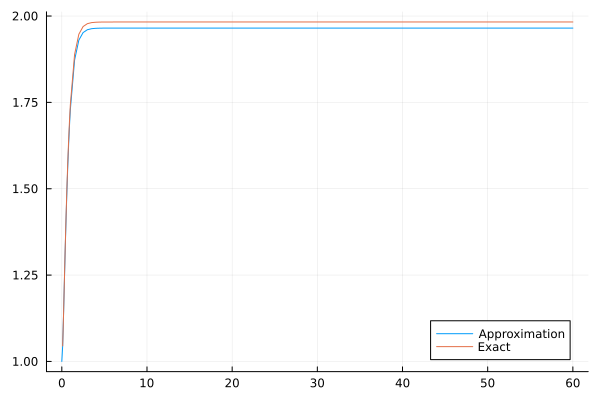

In [15]:
function surface_area_spheroid(a, c; n=400)
    """
    轴对称椭球表面积：∫∫ dS
    参数化: r(θ,φ) = (a·sinθ·cosφ, a·sinθ·sinφ, c·cosθ)
    面积元: dS = a·√(a²sin²θ + c²cos²θ) dθ dφ
    """
    x, w = gausslegendre(n)  # x ∈ [-1,1], x = cosθ
    
    # x = cosθ, 所以 sin²θ = 1 - x²
    sin2θ = 1 .- x.^2
    
    # 面积元被积函数（不含 sinθ，因为已经被 dx 吸收）
    f = a .* sqrt.(c^2 .* sin2θ .+ a^2 .* x.^2)
    
    # ∫_0^{2π} dφ ∫_0^π ... dθ = 2π ∫_{-1}^{1} ... dx
    return 2π * sum(f .* w)
end

function exact_surface_area_spheroid(a, c)
    """
    轴对称椭球表面积精确解
    - 扁平椭球 (a > c):
      S = 2πa² + (πc² / e) * ln((1+e)/(1-e)),  e = √(1 - c²/a²)
    - 拉长椭球 (a < c):
      S = 2πa² + (2πac / e) * asin(e),  e = √(1 - a²/c²)
    """
    if a > c
        e = sqrt(1 - c^2 / a^2)
        S = 2 * π * a^2 + (π * c^2 / e) * log((1 + e)/(1 - e))
    else
        e = sqrt(1 - a^2 / c^2)
        S = 2 * π * a^2 + (2 * π * a * c / e) * asin(e)
    end
    return S
end

es1 = 0.0:0.1:1.0
es2 = 1.0:0.5:60.0
es = unique(vcat(collect(es1), collect(es2)))
areas1 = zeros(length(es))
areas2 = zeros(length(es))

R = 30.0
area0 = 4 * pi * R^2

for (i, e) in enumerate(es)
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    areas1[i] = 4 * pi * ((a^1.6075 * b^1.6075 + a^1.6075 * c^1.6075 + b^1.6075 * c^1.6075)/3)^(1/1.6075) / area0
    areas2[i] = exact_surface_area_spheroid(a, c) / area0
end
plot(es, areas1, label="Approximation")
plot!(es, areas2, label="Exact")

In [ ]:
es1 = 0.0:0.1:1.0
es2 = 1.0:1.0:10.0

es = unique(vcat(collect(es1), collect(es2)))
R = 30.0

Ts = 220.0:-0.10:150
mu_B = 0.0

data = zeros(length(es), 4)  # R, dphi_T dphi1_T lambda
data[:, 1] = es
phius = zeros(length(Ts))
Phi1s = zeros(length(Ts))
dphius = zeros(length(Ts))
dPhi1s = zeros(length(Ts))

X00 = [-0.01, -0.01, -0.2, 0.8, 0.8]  # phi_u, phi_d, phi_s, Phi1, Phi2
for (i, e) in enumerate(es)
    println("e = ", e)
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    Lambda = Find_IR_el(a, b, c) * hc
    ints = get_nodes_el(128, a, b, c, modes="D")
    X0 = X00
    for (j, T) in enumerate(Ts)
        X0 = Tmu(T/hc, mu_B/hc, X0, ints)
        phius[j] = X0[1]
        Phi1s[j] = X0[4]
        if j==1
            X00 = X0
        end
    end
    derivation!(phius, Ts, dphius)
    derivation!(Phi1s, Ts, dPhi1s)
    inds_max1,_ = findmaxima(dphius)
    inds_max2,_ = findmaxima(dPhi1s)
    dphi_T = Ts[inds_max1[1]]
    dPhi1_T = Ts[inds_max2[1]]
    data[i, 2] = dphi_T
    data[i, 3] = dPhi1_T
    data[i, 4] = Lambda
end
df = DataFrame(e=data[:,1], dphi_T=data[:,2], dPhi1_T=data[:,3], lambda=data[:,4])
outpath = "../../data/FV/dphi_es.csv"
CSV.write(outpath, df)




e = 0.0
a,b,c=30.0,30.0,30.0
 IR=0.06003080029233736
a,b,c=30.0,30.0,30.0
 IR=0.06003080029233736
e = 0.1
a,b,c=25.19886226509049,25.19886226509049,42.520846196294244
 IR=0.063667736356621
a,b,c=25.19886226509049,25.19886226509049,42.520846196294244
 IR=0.063667736356621
e = 0.2
a,b,c=22.002378873275983,22.002378873275983,55.773061765180564
 IR=0.07026244822109862
a,b,c=22.002378873275983,22.002378873275983,55.773061765180564
 IR=0.07026244822109862
e = 0.3
a,b,c=19.73715118825253,19.73715118825253,69.3098291707641
 IR=0.07721472779646142
a,b,c=19.73715118825253,19.73715118825253,69.3098291707641
 IR=0.07721472779646142
e = 0.4
a,b,c=18.06617122033914,18.06617122033914,82.72399893699856
 IR=0.08380797960059536
a,b,c=18.06617122033914,18.06617122033914,82.72399893699856
 IR=0.08380797960059536
e = 0.5
a,b,c=16.799575796316645,16.799575796316645,95.6680965259515
 IR=0.08982070449392833
a,b,c=16.799575796316645,16.799575796316645,95.6680965259515
 IR=0.08982070449392833
e = 0.6
a,b,c=15.8

"../../data/FV/dphi_es.csv"

In [ ]:
plot(Rs, Lambda_I1, lw=2, linestyle=:dot)
plot!(Rs, Lambda_I2, lw=2, linestyle=:dash)

In [ ]:
es = 0.0:0.01:0.99
Lambda_J1 = similar(es)
Lambda_J2 = similar(es)
for (i, e) in enumerate(es)
    R = 7.0
    V = (4/3)*pi*R^3
    c = R
    ab = (3*V)/(4*pi) / c  
    #e = 0.0
    a = sqrt(ab / sqrt(1 - e^2))
    b = sqrt(ab * sqrt(1 - e^2)) 
    Lambda_J1[i] = Find_IR_el(a, b, c)
    Lambda_J2[i] = Find_IR_el(a, b, c;modes="N")
   # println("e=$(e), Lambda_I=$(Lambda_I2[i])")
end


In [ ]:
plot(es, Lambda_J1)
plot!(es, Lambda_J2)

In [ ]:
# 计算不同离心率下的表面积（使用近似公式）
function surface_area_ellipsoid(a, b, c)
    # Knud Thomsen 近似公式
    p = 1.6075
    return 4π * ((a^p * b^p + a^p * c^p + b^p * c^p)/3)^(1/p)
end




In [ ]:
# 示例：R=20, V固定
R = 20.0
V = (4/3)*pi*R^3
c = R
ab = (3*V)/(4*pi) / c

es = 0.0:0.01:0.99
S_values = similar(es)

for (i, e) in enumerate(es)
    a = sqrt(ab / sqrt(1 - e^2))
    b = sqrt(ab * sqrt(1 - e^2))
    S_values[i] = surface_area_ellipsoid(a, b, c) / (4*pi * R^2)
end
plot(es, S_values)

In [ ]:
# 使用示例
R = 20.0
scale_factors = 0.0:0.01:1.00
S_vv = similar(scale_factors)
for (i, s) in enumerate(scale_factors)
    a, b, c = parametrize_by_shape(R, s)
    S_vv[i] = surface_area_ellipsoid(a, b, c) / (4π * R^2)
end
plot(scale_factors, S_vv)

In [ ]:
# 测试
R = 10.0
δ_values = 0.0:0.1:10.0
S_values = similar(δ_values)

for (i, δ) in enumerate(δ_values)
    a, b, c = parametrize_deformation(R, δ;para=3.0)
    S_values[i] = surface_area_ellipsoid(a, b, c) / (4π*R^2)
end

plot(δ_values, S_values, xlabel="δ", ylabel="S/S₀", lw=2, label="")

In [ ]:
function parametrize_deformation(R, δ;para=2.0,scale=1.0)
    """
    δ: 变形参数 (0 ≤ δ < ∞)
    para: 调节变形幅度的参数
    scale: +1 压扁 -1 拉长
    - δ = 0: 球形 (a=b=c=R)
    - δ > 0 (且 scale=1.0): 扁平椭球(a=b > c)
    - δ > 0 (且 scale=-1.0): 拉长椭球(a=b < c)
    - 表面积单调递增
    """
    V = (4/3)*π*R^3
    
    # 基于 β₂ 的简化
    β₂ = tanh(δ)  # 保证 β₂ < 1
  #@  para = 1.8
    a = R * (1 + para * β₂)^(scale * 2/3)
    b = a
    c = V / ((4/3)*π*a*b)
    
    return a, b, c
end


In [ ]:
# 使用示例
R = 30.0
S0 = 4π * R^2
deltas = 0.0:0.01:1.0
S_vv = similar(deltas)
for (i, δ) in enumerate(deltas)
    a, b, c = parametrize_deformation(R, δ;para=3.0, scale=-1.0)
    S_vv[i] = surface_area_ellipsoid(a, b, c) /S0
end
plot(deltas, S_vv, xlabel=L"\delta_N", ylabel=L"S/S_0", 
     lw=2, label="", 
     framestyle=:box,
     grid=true,
     minorticks=2)
savefig("SurfaceArea.svg")

In [ ]:
delta_s = 0.0:0.01:1.0
LambdaIR = similar(delta_s)
for (i, δ) in enumerate(delta_s)
    R = 30.0
    a, b, c = parametrize_deformation(R, δ;para=3.0, scale=-1.0)
    LambdaIR[i] = Find_IR_el(a, b, c,modes="D")
end

In [ ]:
plot(delta_s, LambdaIR, xlabel=L"\delta_D", ylabel=L"\Lambda_{\rm IR}", 
     lw=2, label="", 
     framestyle=:box,
     grid=true,
     minorticks=2)
savefig("LambdaIR_D.svg")

In [ ]:
delta_s2 = 0.0:0.01:1.0
LambdaIR2 = similar(delta_s2)
for (i, δ) in enumerate(delta_s2)
    R = 30.0
    a, b, c = parametrize_deformation(R, δ;para=3.0, scale=-1.0)
    LambdaIR2[i] = Find_IR_el(a, b, c,modes="N")
end

In [ ]:
plot(delta_s2, LambdaIR2, xlabel=L"\delta_N", ylabel=L"\Lambda_{\rm IR}", 
     lw=2, label="", 
     framestyle=:box,
     grid=true,
     minorticks=2)
savefig("LambdaIR_N.svg")

In [ ]:
using CSV 
using DataFrames
using Dierckx
using Plots
firstline_path = "../../data/FV/1st/first_R100_e03.csv"
df_in = CSV.read(firstline_path, DataFrame)
df_unique = unique(df_in, :T)
sort!(df_unique, :T)
T_unique = df_unique.T
mu_unique = df_unique.mu_star
mu_of_T = Spline1D(T_unique, mu_unique, k=1)

In [ ]:
mu_test = mu_of_T.(T_unique)
plot(T_unique, mu_test, lw=1, label="")
plot!(T_unique, mu_unique, lw=1, linestyle=:dash, label="")



In [ ]:
println(mu_of_T(122.0))
println(mu_of_T(123.0))
println(mu_of_T(124.0))

In [ ]:
using Plots
using LaTeXStrings

In [ ]:
us = 0.0:0.01:2*pi
vs = 0.0:0.01:pi 

a1 = 30.0
c1 = 30.0

a2 = 19.0
c2 = 69.0

a3 = 15.0
c3 = 119.0

a4 = 13.0
c4 = 146.0



In [ ]:
us = range(0, 2π; length=400)

a1, c1 = 30.0, 30.0
a2, c2 = 19.0, 69.0
a3, c3 = 15.0, 119.0
a4, c4 = 13.0, 146.0

x1 = a1 .* cos.(us); y1 = c1 .* sin.(us)
x2 = a2 .* cos.(us); y2 = c2 .* sin.(us)
x3 = a3 .* cos.(us); y3 = c3 .* sin.(us)
x4 = a4 .* cos.(us); y4 = c4 .* sin.(us)

plot(x1, y1; aspect_ratio=1, lw=2, label=L"e=0.0")
plot!(x2, y2; lw=2, label=L"e=0.3", linestyle=:dash)
plot!(x3, y3; lw=2, label=L"e=0.7", linestyle=:dot)
plot!(x4, y4; lw=2, label=L"e=1.0", linestyle=:dashdot)
plot!(xlabel="X", ylabel="Z",
    xlimits=(-250,250),
     framestyle=:box,
     grid=true,
     minorticks=2)
savefig("EllipsoidShapes.svg")

In [1]:
include("../../src/Finite_Vol/pnjl_FV.jl")
include("derv.jl")
using Plots 
using LaTeXStrings
using DataFrames, CSV
using QuadGK, LinearAlgebra
using Peaks 

In [2]:

function parametrize_deformation(R, δ;para=2.0,scale=1.0)
    """
    δ: 变形参数 (0 ≤ δ < ∞)
    para: 调节变形幅度的参数
    scale: +1 压扁 -1 拉长
    - δ = 0: 球形 (a=b=c=R)
    - δ > 0 (且 scale=1.0): 扁平椭球(a=b > c)
    - δ > 0 (且 scale=-1.0): 拉长椭球(a=b < c)
    - 表面积单调递增
    """
    V = (4/3)*π*R^3
    
    # 基于 β₂ 的简化
    β₂ = tanh(δ)  # 保证 β₂ < 1
  #@  para = 1.8
    a = R * (1 + para * β₂)^(scale * 2/3)
    b = a
    c = V / ((4/3)*π*a*b)
    
    return a, b, c
end


parametrize_deformation (generic function with 1 method)

In [5]:
rhos = 3.00:-0.01:0.01
X0 = [-1.8,-1.8, -2.2, 0.01, 0.01, 1200/hc]  # phi_u, phi_d, phi_s, Phi1, Phi2, muB

R = 30.0
e = 1.0
a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
modes = "D"
ints = get_nodes_el(300, a, b, c;modes=modes)
T = 50.0
data = zeros(length(rhos),7)
data[:,1] .=rhos
for (i, rhoB) in enumerate(rhos)
    X0 = Trho(T/hc, rhoB, X0, ints)

    data[i, 2:6] = X0[1:5]

    data[i, 7] = X0[6] * hc
end


a,b,c=13.57636520545484,13.57636520545484,146.4862091040697
 IR=0.11059769513806485


In [ ]:
rhos = data[:,1]
mus = data[:,7]

inds_max, vals_max = findmaxima(mus)
inds_min, vals_min = findminima(mus)
println("Maxima indices: ", inds_max)
println("Maxima values: ", vals_max)
println("Minima indices: ", inds_min)
println("Minima values: ", vals_min)
p = plot(rhos, mus;
         lw=1.2, label=L"\mu_B",
         xlabel=L"\rho_B", ylabel=L"\mu_B",
         framestyle=:box, grid=true)

if !isempty(inds_max)
    scatter!(p, rhos[inds_max], vals_max; marker=:circle, ms=4, c=:red, label="maxima")

end

if !isempty(inds_min)
    scatter!(p, rhos[inds_min], vals_min; marker=:square, ms=4, c=:blue, label="minima")

end

display(p)

In [ ]:
Ts = 300.0:-2.0:50.0
X0 = [-0.01,-0.01, -0.40, 0.81,0.801]  
mu_B = 0.0

R = 30.0
e = 0.0
a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
modes = "D"
ints = get_nodes_el(200, a, b, c;modes=modes)

phius = similar(Ts)
Phi1s = similar(Ts)

for (i, T) in enumerate(Ts)
    X0 = Tmu(T/hc, mu_B/hc, X0, ints)
    phius[i] = X0[1]
    Phi1s[i] = X0[4]
end

In [ ]:
# 测试
Rs = 100.0:-1.0:15.0
delta = 0.0
IRs = similar(Rs)

for (i, R) in enumerate(Rs)
    a, b, c = parametrize_deformation(R, delta;para=3.0,scale=-1.0)
    IRs[i] = Find_IR_el(a, b, c; modes="D")
end

plot(Rs, IRs, xlabel=L"R", ylabel=L"\Lambda_{IR}", lw=2, label="")

In [ ]:
# 测试
Rs = 20.0
deltas = 0.0:0.05:1.0
IRs = similar(deltas)


for (i, delta) in enumerate(deltas)
    a, b, c = parametrize_deformation(Rs, delta;para=3.0,scale=-1.0)
    IRs[i] = Find_IR_el(a, b, c; modes="D")
end

plot(deltas, IRs, xlabel=L"\delta", ylabel=L"\Lambda_{IR}", lw=2, label="")

In [ ]:
Ts = 210.0:-1.0:10.0

mu_B = 1200.0

R = 20.0
es = [1.0]
p1 = plot()
p3 = plot()
for e in es
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    modes = "D"
    ints = get_nodes_el(300, a, b, c;modes=modes)

    phius = similar(Ts)
    dphius = similar(Ts)
    X0 = [-0.01,-0.01, -0.40, 0.81,0.801]  
    for (i, T) in enumerate(Ts)
        X0 = Tmu(T/hc, mu_B/hc, X0, ints)
        phius[i] = X0[1]
       
    end
    plot!(p1, Ts, phius, lw=1.5, label="e=$(e)")
    
    derivation!(phius, Ts, dphius)
    plot!(p3, Ts, dphius, lw=1.5, label="e=$(e)")
    inds_max, vals_max = findmaxima(dphius)
    println("e=$(e), T_max=$(Ts[inds_max])")
end
display(p1)
display(p3)

In [ ]:
mu_Bs1 = 0.0:3.0:850.0
mu_Bs2 = 851.0:0.5:900.0
mu_Bs = vcat(mu_Bs1, mu_Bs2)

T = 20.0

R = 20.0
es = [1.0]
p1 = plot()
p2 = plot()
for e in es
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    modes = "D"
    ints = get_nodes_el(300, a, b, c;modes=modes)

    phius = similar(mu_Bs)  
    dphius = similar(mu_Bs)
    X0 = [-1.8,-1.8, -2.2, 0.11, 0.11]
    #X0 = [-0.01,-0.01, -0.40, 0.81,0.801]
    for (i, mu_B) in enumerate(mu_Bs)
        X0 = Tmu(T/hc, mu_B/hc, X0, ints)
        phius[i] = X0[1]
    end
    derivation!(phius, mu_Bs, dphius)
    inds_max, vals_max = findmaxima(dphius)
    println("e=$(e), muB_max=$(mu_Bs[inds_max])")
    p1 = plot(mu_Bs, phius)
    p2 = plot(mu_Bs, dphius)
end
display(p1)
display(p2)


In [ ]:
Ts = 300.0:-2.0:50.0

mu_B = 0.0

R = 30.0
es = [0.0, 0.3, 1.0]
p1 = plot()
p2 = plot()
for e in es
    a, b, c = parametrize_deformation(R, e;para=3.0,scale=-1.0)
    modes = "D"
    ints = get_nodes_el(200, a, b, c;modes=modes)

    phius = similar(Ts)
    Phi1s = similar(Ts)
    X0 = [-0.01,-0.01, -0.40, 0.81,0.801]  
    for (i, T) in enumerate(Ts)
        X0 = Tmu(T/hc, mu_B/hc, X0, ints)
        phius[i] = X0[1]
        Phi1s[i] = X0[4]
    end
    plot!(p2, Ts, phius, lw=1.5, label="e=$(e)")
    plot!(p1, Ts, Phi1s, lw=1.5, label="e=$(e)")

end
display(p1)
display(p2)

In [ ]:
using DataFrames, CSV

In [ ]:
df = CSV.read("../../data/FV/Trho_Maxwell_R=30.0_e=1.0.csv", DataFrame)
Ts = df.T
mu_star = df.mu_star
df_out = DataFrame(T=Ts, mu_star=mu_star)
CSV.write("../../data/FV/1st/first_R30_e10.csv", df_out)